In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import biomassml
from biomassml.io import *
from biomassml.predict_outputs import *

DATA_DIR = '.../data/'
MODEL_DIR = '.../biomassml/'

output_names = ['CO (vol%)', r'H$_2$ (vol%)', r'CH$_4$ (vol%)', 'COMBgas (vol%)', 
                r'H$_2$/CO', r'GAS (m$^3$/kg biom)', r'E$_{\rm yield}$ (MJ/kg biom)']

### load training GASIF dataset

In [3]:
dfGASIF_dataset = pd.read_csv(os.path.join(DATA_DIR, 'data_GASIF_biomass.csv'))

In [4]:
dfGASIF_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BIOMASS           30 non-null     object 
 1   SA                30 non-null     float64
 2   SBR               30 non-null     float64
 3   HHVbiom (MJ/kg)   30 non-null     float64
 4   T (K)             30 non-null     int64  
 5   SR                30 non-null     float64
 6   C (%)             30 non-null     float64
 7   N (%)             30 non-null     float64
 8   H (%)             30 non-null     float64
 9   S (%)             30 non-null     float64
 10  O (%)             30 non-null     float64
 11  ash (%)           30 non-null     float64
 12  VM (%)            30 non-null     float64
 13  FC (%)            30 non-null     float64
 14  MC (%)            30 non-null     float64
 15  volCO2 (%)        30 non-null     float64
 16  volCO (%)         30 non-null     float64
 17 

In [5]:
FEATURES_GASIF = pd.concat([dfGASIF_dataset.iloc[:,1:7], dfGASIF_dataset.iloc[:,[8,10,11,12,13,14]]], axis=1)
FEATURES_GASIF.head(1)

,SA,SBR,HHVbiom (MJ/kg),T (K),SR,C (%),H (%),O (%),ash (%),VM (%),FC (%),MC (%)
0,2.33,1.1,19.5649,1173,0.13,49.44,5.85,42.9,1.45,78.93,19.62,6.52


In [6]:
TARGETS_GASIF = dfGASIF_dataset.iloc[:,[16,18,19,20]]
TARGETS_GASIF.head(1)

,volCO (%),volH2 (%),volCOMB (%),GAS (m3/kg biom)
0,23.6541,36.4296,67.4756,0.7975


#### get scalers from dfGASIF_dataset

In [7]:
x_scaler, y_scaler = get_scalers(FEATURES_GASIF, TARGETS_GASIF)
joblib.dump(x_scaler, 'x_scaler')
joblib.dump(y_scaler, 'y_scaler')

['y_scaler']

### load model

In [9]:
model = load_joblib(os.path.join(MODEL_DIR, 'model_GPR_retrained'))

### predictions for NEW BIOMASSES

In [10]:
df_newBIOMASSES = pd.read_csv(os.path.join(DATA_DIR, 'data_NEW_biomasses.csv'))

In [11]:
df_newBIOMASSES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIOMASS_name     68 non-null     object 
 1   BIOMASS_name2    68 non-null     object 
 2   BIOMASS          68 non-null     object 
 3   ORIGIN           68 non-null     object 
 4   SA               68 non-null     float64
 5   SBR              68 non-null     float64
 6   HHVbiom (MJ/kg)  68 non-null     float64
 7   T (K)            68 non-null     int64  
 8   SR               68 non-null     float64
 9   C (%)            68 non-null     float64
 10  N (%)            68 non-null     float64
 11  H (%)            68 non-null     float64
 12  S (%)            68 non-null     float64
 13  O (%)            68 non-null     float64
 14  ash (%)          68 non-null     float64
 15  VM (%)           68 non-null     float64
 16  FC (%)           68 non-null     float64
 17  MC (%)           6

#### T = 1173 K, SA = 2.33 (70/30 vol/vol)

In [12]:
FEATURES_NEWbiomass = pd.concat([df_newBIOMASSES.iloc[:,4:10], df_newBIOMASSES.iloc[:,[11,13,14,15,16,17]]], axis=1)
FEATURES_NEWbiomass.head(2)

,SA,SBR,HHVbiom (MJ/kg),T (K),SR,C (%),H (%),O (%),ash (%),VM (%),FC (%),MC (%)
0,2.3333,2.0502,18.77,1173,0.25,46.50,5.97,40.16,6.18,73.21,20.61,8.18
1,2.3333,2.2003,19.05,1173,0.25,50.14,5.95,40.10,3.04,76.10,20.86,7.85


In [13]:
X=FEATURES_NEWbiomass
y = TARGETS_GASIF

y_pred_mu_CO = predict_CO(X, model, x_scaler, y_scaler)[0]
y_pred_std_CO = predict_CO(X, model, x_scaler, y_scaler)[1]

y_pred_mu_H2 = predict_H2(X, model, x_scaler, y_scaler)[0]
y_pred_std_H2 = predict_H2(X, model, x_scaler, y_scaler)[1]

y_pred_mu_COMB = predict_COMB(X, model, x_scaler, y_scaler)[0]
y_pred_std_COMB = predict_COMB(X, model, x_scaler, y_scaler)[1]

y_pred_mu_GAS = predict_GAS(X, model, x_scaler, y_scaler)[0]
y_pred_std_GAS = predict_GAS(X, model, x_scaler, y_scaler)[1]

y_pred_mu_CH4 = predict_CH4_covar(X, y, model, x_scaler, y_scaler)[0]
y_pred_std_CH4_covar = predict_CH4_covar(X, y, model, x_scaler, y_scaler)[1]

y_pred_mu_H2CO = predict_H2CO(X, model, x_scaler, y_scaler)[0]
y_pred_std_H2CO = predict_H2CO(X, model, x_scaler, y_scaler)[1]

y_pred_mu_Eyield = predict_Eyield(X, model, x_scaler, y_scaler)[0]
y_pred_std_Eyield = predict_Eyield(X, model, x_scaler, y_scaler)[1]

output_order = ['CO (vol%)', r'H$_2$ (vol%)', r'CH$_4$ (vol%)', 'COMBgas (vol%)', r'H$_2$/CO', 
                r'GAS (m$^3$/kg biom)', r'E$_{\rm yield}$ (MJ/kg biom)']
df_predictions_mu = pd.DataFrame(np.hstack((y_pred_mu_CO, y_pred_mu_H2, y_pred_mu_CH4, y_pred_mu_COMB,
                                            y_pred_mu_H2CO, y_pred_mu_GAS, y_pred_mu_Eyield)), columns=output_order)
df_predictions_mu['BIOMASS'] = df_newBIOMASSES['BIOMASS']
df_predictions_std = pd.DataFrame(np.hstack((y_pred_std_CO, y_pred_std_H2, y_pred_std_CH4_covar.reshape(-1, 1), 
                                             y_pred_std_COMB, y_pred_std_H2CO, y_pred_std_GAS, 
                                             y_pred_std_Eyield)), columns=output_order)

In [14]:
df_predictions_mu.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom),BIOMASS
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771,ALH


In [15]:
df_predictions_std.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom)
0,2.496099,2.019309,1.561786,3.062825,0.333421,0.146567,1.905054


In [16]:
df_predictions_mu = pd.concat([df_predictions_mu, df_newBIOMASSES['BIOMASS_name']], axis=1)
df_predictions_mu.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom),BIOMASS,BIOMASS_name
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771,ALH,almond hulls


In [17]:
df_predictions_mu = pd.concat([df_predictions_mu, df_newBIOMASSES['ORIGIN']], axis=1)
df_predictions_mu.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom),BIOMASS,BIOMASS_name,ORIGIN
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771,ALH,almond hulls,fruit bunches


### cluster analysis: K-Means

In [18]:
FEATURES_NEWbiomass.head(1)

,SA,SBR,HHVbiom (MJ/kg),T (K),SR,C (%),H (%),O (%),ash (%),VM (%),FC (%),MC (%)
0,2.3333,2.0502,18.77,1173,0.25,46.5,5.97,40.16,6.18,73.21,20.61,8.18


In [19]:
df_predictions_mu.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom),BIOMASS,BIOMASS_name,ORIGIN
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771,ALH,almond hulls,fruit bunches


In [20]:
TARGETS_NEWbiomass = df_predictions_mu.iloc[:,0:7]
TARGETS_NEWbiomass.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom)
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771


In [21]:
TARGETS_GASIF_KPI = df_predictions_mu.iloc[:,[4,7]]
TARGETS_GASIF_KPI.head(1)

,H$_2$/CO,BIOMASS
0,2.074441,ALH


In [22]:
y_labels = np.array(df_predictions_mu['ORIGIN'])
y_labels.shape

(68,)

In [23]:
label_encoder = LabelEncoder()
y_true_labels = label_encoder.fit_transform(y_labels)

In [24]:
label_encoder.classes_

array(['bagasse', 'bark', 'fruit bunches', 'fruit pits', 'fruit shells',
       'fruit waste', 'grass', 'nut shells', 'seeds', 'stalks', 'straw',
       'torrefied wood', 'wood'], dtype=object)

In [25]:
hue_order = ['wood',
             'fruit pits',
             'torrefied wood',
             'seeds',
             'straw',
             'grass',
             'bark',
             'bagasse',
             'fruit waste',
             'fruit shells',
             'fruit bunches',
             'stalks',
             'nut shells']

#### K-Means 4 clusters

In [26]:
colors = ['#134c87', '#75b2d4', '#8d0c25', '#7f7f7f']

In [27]:
TARGETS_NEWbiomass.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom)
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771


In [28]:
_, y_scaler_cluster = get_scalers(FEATURES_NEWbiomass, TARGETS_NEWbiomass)
TARGETS_scaled = y_scaler_cluster.transform(TARGETS_NEWbiomass)
X = TARGETS_scaled
X.shape

(68, 7)

In [29]:
kmeans = KMeans(
    init='k-means++',
    n_clusters=4,
    n_init=50,
    max_iter=500,
    random_state=42,
    algorithm='auto'
    )

kmeans.fit(X)

KMeans(max_iter=500, n_clusters=4, n_init=50, random_state=42)

In [30]:
kmeans.cluster_centers_

array([[-0.27047374,  1.51691639, -0.75291678,  0.07205945,  0.30867286,
         1.00526026,  0.57937381],
       [ 0.03942175, -0.48521494,  0.3376796 , -0.04931666, -0.37430403,
        -0.21814941, -0.19030488],
       [-1.05380224,  0.4929646 , -0.97369447, -1.09434161,  1.1066281 ,
        -1.08694423, -1.09179937],
       [ 1.39882195, -0.96002868,  1.27067852,  1.34681226, -1.14972635,
         0.98815889,  1.202852  ]])

In [31]:
df_predictions_mu.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom),BIOMASS,BIOMASS_name,ORIGIN
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771,ALH,almond hulls,fruit bunches


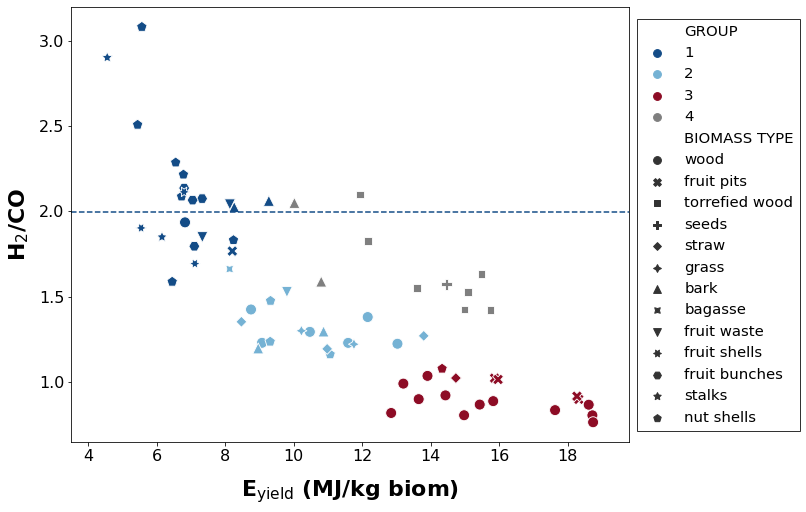

In [32]:
x_var=6
y_var=4
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
data = df_predictions_mu.iloc[:,[x_var, y_var]].copy()
data['groups'] = kmeans.labels_
data['biomass type'] = label_encoder.inverse_transform(y_true_labels)
sns.scatterplot(x=output_names[x_var], y=output_names[y_var], hue='groups', s=120, style='biomass type', data=data,
                hue_order=[2,1,3,0], style_order=hue_order, palette=colors)
ax.axhline(y=1.995, linestyle='--', linewidth=1.5, color='#134c87')
ax.set_xlabel(output_names[x_var], fontsize=22, fontweight='bold', labelpad=14)
ax.set_ylabel(output_names[y_var], fontsize=22, fontweight='bold', labelpad=8)
ax.tick_params(labelsize=16)
ax.axes.set_xlim(3.5, 19.8)
ax.axes.set_xticks(np.arange(4, 20, 2))

handles, labels = ax.get_legend_handles_labels()
labels = ['GROUP', '1', '2', '3', '4', 'BIOMASS TYPE'] + hue_order
ax.legend(handles, labels, prop={'size': 14.9}, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, markerscale=1.3, 
          fancybox=False, edgecolor='black')
plt.show()

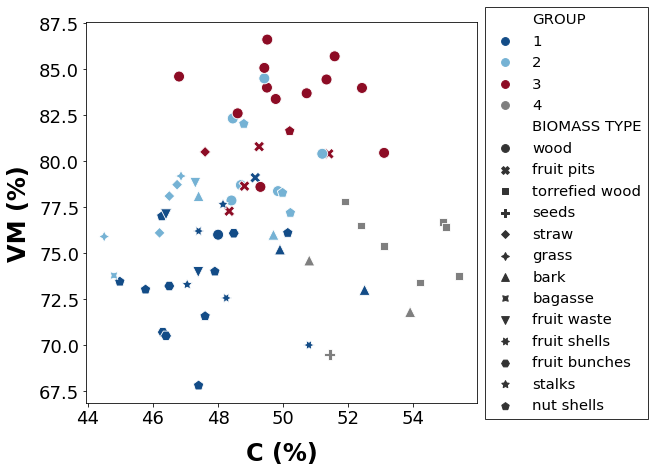

In [33]:
x_var=5
y_var=9
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
data = FEATURES_NEWbiomass.iloc[:,[x_var, y_var]].copy()
data['groups'] = kmeans.labels_
data['biomass type'] = label_encoder.inverse_transform(y_true_labels)
sns.scatterplot(x=FEATURES_NEWbiomass.columns[x_var], y=FEATURES_NEWbiomass.columns[y_var],
                hue='groups', s=120, style='biomass type', data=data,
                hue_order=[2,1,3,0], style_order=hue_order, palette=colors)
ax.set_xlabel(FEATURES_NEWbiomass.columns[x_var], fontsize=24, fontweight='bold', labelpad=14)
ax.set_ylabel(FEATURES_NEWbiomass.columns[y_var], fontsize=24, fontweight='bold', labelpad=8)
ax.tick_params(labelsize=18)

handles, labels = ax.get_legend_handles_labels()
labels = ['GROUP', '1', '2', '3', '4', 'BIOMASS TYPE'] + hue_order
ax.legend(handles, labels, prop={'size': 14.9}, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, markerscale=1.3, 
          fancybox=False, edgecolor='black')
plt.savefig('clusters_prop.pdf', bbox_inches='tight')
plt.show()

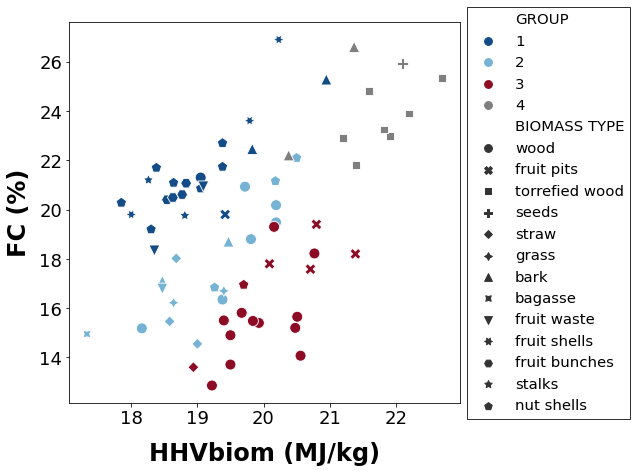

In [34]:
x_var=2
y_var=10
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
data = FEATURES_NEWbiomass.iloc[:,[x_var, y_var]].copy()
data['groups'] = kmeans.labels_
data['biomass type'] = label_encoder.inverse_transform(y_true_labels)
sns.scatterplot(x=FEATURES_NEWbiomass.columns[x_var], y=FEATURES_NEWbiomass.columns[y_var],
                hue='groups', s=120, style='biomass type', data=data,
                hue_order=[2,1,3,0], style_order=hue_order, palette=colors)
ax.set_xlabel(FEATURES_NEWbiomass.columns[x_var], fontsize=24, fontweight='bold', labelpad=14)
ax.set_ylabel(FEATURES_NEWbiomass.columns[y_var], fontsize=24, fontweight='bold', labelpad=8)
ax.tick_params(labelsize=18)

handles, labels = ax.get_legend_handles_labels()
labels = ['GROUP', '1', '2', '3', '4', 'BIOMASS TYPE'] + hue_order
ax.legend(handles, labels, prop={'size': 14.9}, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, markerscale=1.3, 
          fancybox=False, edgecolor='black')
plt.savefig('clusters_prop.pdf', bbox_inches='tight')
plt.show()

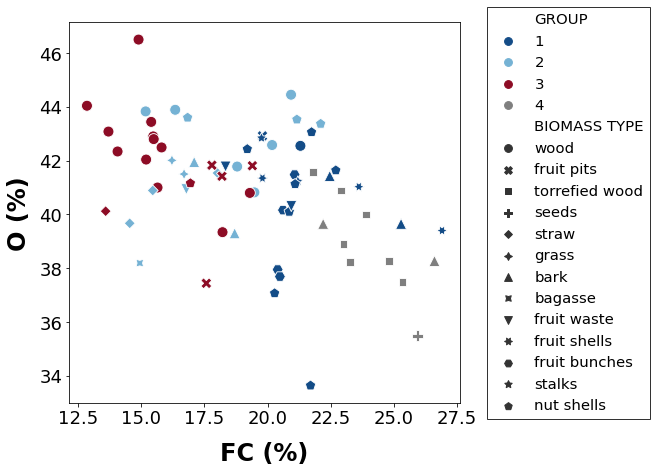

In [35]:
x_var=10
y_var=7
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
data = FEATURES_NEWbiomass.iloc[:,[x_var, y_var]].copy()
data['groups'] = kmeans.labels_
data['biomass type'] = label_encoder.inverse_transform(y_true_labels)
sns.scatterplot(x=FEATURES_NEWbiomass.columns[x_var], y=FEATURES_NEWbiomass.columns[y_var],
                hue='groups', s=120, style='biomass type', data=data,
                hue_order=[2,1,3,0], style_order=hue_order, palette=colors)
ax.set_xlabel(FEATURES_NEWbiomass.columns[x_var], fontsize=24, fontweight='bold', labelpad=14)
ax.set_ylabel(FEATURES_NEWbiomass.columns[y_var], fontsize=24, fontweight='bold', labelpad=8)
ax.tick_params(labelsize=18)

handles, labels = ax.get_legend_handles_labels()
labels = ['GROUP', '1', '2', '3', '4', 'BIOMASS TYPE'] + hue_order
ax.legend(handles, labels, prop={'size': 14.9}, loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, markerscale=1.3, 
          fancybox=False, edgecolor='black')
plt.savefig('clusters_prop.pdf', bbox_inches='tight')
plt.show()